In [262]:
#count plots
#binning
#replace with re and normal replace
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [263]:
data=pd.read_csv('Churn_Modelling.csv')

In [264]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [265]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# CHECKING FOR IMBALANCE DATA

In [267]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [268]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Taha PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

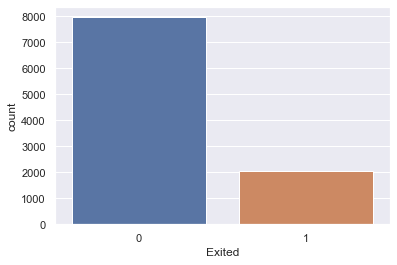

In [269]:
sns.countplot(data['Exited'])

In [270]:
#data is clean we just have to encode and standarize it.

In [271]:
df_or=data.iloc[:,3:]

In [272]:
df_or

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [273]:


import category_encoders as ce
encoder = ce.OrdinalEncoder()
df_or['Gender'] = encoder.fit_transform(df_or['Gender'])

In [274]:
df_or=pd.concat([df_or,pd.get_dummies(df_or['Geography'])],axis=1)

In [275]:
df_or=df_or.drop(columns=['Geography'])

In [276]:
df_or.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## BALANCING IMBALANCE BY DIFFERENT METHODS

### UNDERSAMPLING:

In [277]:
df_ones=df_or[df_or['Exited']==1]
df_zeros=df_or[df_or['Exited']==0]

In [278]:
df_ones.shape,len(df_zeros)

((2037, 13), 7963)

In [279]:

import numpy as np

random_integers = np.random.randint(0,len(df_zeros),size=2037)
len(random_integers)

2037

In [280]:
df_zeros=df_zeros.iloc[random_integers]

In [281]:

df=pd.concat([df_zeros,df_ones],axis=0)

In [282]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
1162,615,1,30,9,0.00,1,1,0,87347.82,0,1,0,0
7628,850,2,28,8,99986.98,1,1,0,196582.55,0,1,0,0
564,689,1,38,6,121021.05,1,1,1,12182.15,0,0,0,1
5582,534,2,38,3,0.00,1,0,0,143938.27,0,1,0,0
4146,658,1,24,2,0.00,2,1,1,84694.49,0,1,0,0


In [283]:
2037+2037

4074

##### training model

In [284]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
1162,615,1,30,9,0.00,1,1,0,87347.82,0,1,0,0
7628,850,2,28,8,99986.98,1,1,0,196582.55,0,1,0,0
564,689,1,38,6,121021.05,1,1,1,12182.15,0,0,0,1
5582,534,2,38,3,0.00,1,0,0,143938.27,0,1,0,0
4146,658,1,24,2,0.00,2,1,1,84694.49,0,1,0,0


In [285]:
X=df.drop(columns=['Exited'])
y=df.Exited

In [286]:
X.shape,y.shape

((4074, 12), (4074,))

In [287]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape

((3259, 12), (3259,))

In [288]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Tenure','EstimatedSalary','NumOfProducts','Age','Balance','CreditScore']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


In [289]:
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [290]:

model = keras.Sequential([
    keras.layers.Dense(23, activation='relu', input_shape=(12,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 0.6719 - accuracy: 0.5759
Epoch 2/50
102/102 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.6919
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7165
Epoch 4/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7303
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7423
Epoch 6/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7536
Epoch 7/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7604
Epoch 8/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7622
Epoch 9/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7650
Epoch 10/50
102/102 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7693

In [291]:

model = keras.Sequential([
    keras.layers.Dense(23, activation='relu', input_shape=(12,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=90)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/90
102/102 [==============================] - 1s 2ms/step - loss: 0.7271 - accuracy: 0.4876
Epoch 2/90
102/102 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5640
Epoch 3/90
102/102 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6042
Epoch 4/90
102/102 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6238
Epoch 5/90
102/102 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6585
Epoch 6/90
102/102 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.6757
Epoch 7/90
102/102 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6793
Epoch 8/90
102/102 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6763
Epoch 9/90
102/102 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.6870
Epoch 10/90
102/102 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7119

102/102 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7613
Epoch 83/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7680
Epoch 84/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7683
Epoch 85/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7637
Epoch 86/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7634
Epoch 87/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7604
Epoch 88/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7613
Epoch 89/90
102/102 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7607
Epoch 90/90
26/26 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7546
Test loss: 0.5006
Test accuracy: 0.7546


In [308]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

63/63 [==============================] - 0s 923us/step


0.1965

In [309]:
model.evaluate(X_train,y_train)

250/250 [==============================] - 0s 1ms/step - loss: 96367.1719 - accuracy: 0.2055


[96367.171875, 0.20550000667572021]

In [310]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Test accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Test accuracy: 0.1965
Confusion Matrix:
[[   0 1607]
 [   0  393]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## oversampling

In [311]:
df_ones=df_or[df_or['Exited']==1]
df_zeros=df_or[df_or['Exited']==0]
import numpy as np

random_integers = np.random.randint(0,len(df_ones),size=len(df_zeros))
len(random_integers)

7963

In [312]:
df_ones=df_ones.iloc[random_integers]
df=pd.concat([df_zeros,df_ones],axis=0)

In [313]:
df


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,822,2,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,2,44,4,142051.07,2,0,1,74940.50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,670,1,65,1,0.00,1,1,1,177655.68,1,0,0,1
1657,704,1,54,6,133656.91,3,1,0,145071.33,1,0,1,0
9539,659,2,29,6,123192.12,1,1,1,56971.41,1,1,0,0
164,683,2,29,0,133702.89,1,1,0,55582.54,1,0,0,1


In [314]:
7963+7963

15926

In [315]:
def training(df):    
    X=df.drop(columns=['Exited'])
    y=df.Exited

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train.shape,y_train.shape



    cols_to_scale = ['Tenure','EstimatedSalary','NumOfProducts','Age','Balance','CreditScore']

    X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


    model = keras.Sequential([
        keras.layers.Dense(23, activation='relu', input_shape=(12,)),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(18, activation='relu'),
        #keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=90)
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions
   

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)
    print("train accuracy",model.evaluate(X_train,y_train))

    print(f"Test accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    return 


In [316]:
training(df)

Epoch 1/90
399/399 [==============================] - 1s 2ms/step - loss: 0.5764 - accuracy: 0.7001
Epoch 2/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4847 - accuracy: 0.7673
Epoch 3/90
399/399 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.7748
Epoch 4/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.7783
Epoch 5/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4527 - accuracy: 0.7816
Epoch 6/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.7860
Epoch 7/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.7887
Epoch 8/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.7878
Epoch 9/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.7905
Epoch 10/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.7902

399/399 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8270
Epoch 83/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.8281
Epoch 84/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8248
Epoch 85/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3807 - accuracy: 0.8257
Epoch 86/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8280
Epoch 87/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.8279
Epoch 88/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8286
Epoch 89/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8292
Epoch 90/90
100/100 [==============================] - 0s 1ms/step - loss: 60958.9844 - accuracy: 0.5628
Test loss: 60958.9844
Test accuracy: 0.5628
399/399 [==============================] - 1s 1ms/step 

##### it is overfitting the model

### essemble

In [317]:
# df_01=pd.concat([df_zeros[:2654],df_ones],axis=0)
# df_02=pd.concatdf_zeros[2654:5308],df_ones],axis=0)
# df_03=pd.concat([df_zeros[5308:],df_ones],axis=0)
df_or.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [340]:
X=df_or.drop(columns=['Exited'])
y=df_or.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [341]:
train=pd.concat([X_train, y_train,],axis=1)
train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
9254,686,2,32,6,0.00,2,1,1,179093.26,1,0,0,0
1561,632,2,42,4,119624.60,2,1,1,195978.86,0,1,0,0
1670,559,2,24,3,114739.92,1,1,0,85891.02,0,0,1,1
6087,561,1,27,9,135637.00,1,1,0,153080.40,1,0,0,1
6669,517,2,56,9,142147.32,1,0,0,39488.04,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,2,54,8,69712.74,1,1,1,69381.05,1,0,0,0
5191,682,1,58,1,0.00,1,1,1,706.50,1,0,0,0
5390,735,1,38,1,0.00,3,0,0,92220.12,1,0,0,1
860,667,2,43,8,190227.46,1,1,0,97508.04,1,0,0,1


In [342]:
df_zeros=train[train["Exited"]==0]
df_ones=train[train["Exited"]==1]
len(df_zeros)+len(df_ones)


8000

In [343]:
y_results=[]
def essemble(X_train, y_train,X_test,y_test):    
    cols_to_scale = ['Tenure','EstimatedSalary','NumOfProducts','Age','Balance','CreditScore']

    X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


    model = keras.Sequential([
        keras.layers.Dense(23, activation='relu', input_shape=(12,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(18, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=90)
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print("train accuracy",model.evaluate(X_train,y_train))


    y_results.append(y_pred_binary)


In [344]:
def data_t(end,start,X_train, y_train):
    train=pd.concat([X_train, y_train],axis=1)
    df_zeros=train[train["Exited"]==0]
    df_ones=train[train["Exited"]==1]
    df_zeros=df_zeros[end:start]
    dummy=pd.concat([df_zeros, df_ones],axis=0)
    X_train=dummy.drop(columns=['Exited'])
    print(len(X_train))
    y_train=dummy.Exited
    return X_train, y_train


In [345]:
x,y=data_t(4236,6356,X_train, y_train)
x

3764


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
6744,777,1,30,4,0.00,2,0,1,115611.97,1,0,0
1814,579,2,31,2,90547.48,2,1,1,18800.13,0,1,0
6822,669,2,47,0,63723.78,2,1,1,181928.25,0,1,0
1011,719,2,35,3,122964.88,1,1,1,138231.70,0,0,1
1577,687,1,21,8,0.00,2,1,1,154767.34,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4555,688,1,35,6,0.00,1,1,0,25488.43,0,0,1
769,531,1,63,1,114715.71,1,0,1,24506.95,1,0,0
1685,613,1,20,0,117356.19,1,0,0,113557.70,0,1,0
5390,735,1,38,1,0.00,3,0,0,92220.12,1,0,0


In [346]:
for i,j in zip([0,2118,4236],[2118,4236,6356]):
    x,y=data_t(i,j,X_train, y_train)
    essemble(x,y,X_test,y_test)

3762
Epoch 1/90
118/118 [==============================] - 1s 2ms/step - loss: 0.7409 - accuracy: 0.5346
Epoch 2/90
118/118 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6034
Epoch 3/90
118/118 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6252
Epoch 4/90
118/118 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.6489
Epoch 5/90
118/118 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6752
Epoch 6/90
118/118 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6770
Epoch 7/90
118/118 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6818
Epoch 8/90
118/118 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.6879
Epoch 9/90
118/118 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7068
Epoch 10/90
118/118 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0

118/118 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7802
Epoch 83/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7685
Epoch 84/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7741
Epoch 85/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7799
Epoch 86/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7818
Epoch 87/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7738
Epoch 88/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7788
Epoch 89/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7677
Epoch 90/90
63/63 [==============================] - 0s 1ms/step - loss: 79984.0781 - accuracy: 0.1965
Test loss: 79984.0781
Test accuracy: 0.1965
118/118 [==============================] - 0s 1ms/step - 

Epoch 70/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7738
Epoch 71/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7727
Epoch 72/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7701
Epoch 73/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7749
Epoch 74/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7735
Epoch 75/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7751
Epoch 76/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7775
Epoch 77/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7804
Epoch 78/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7778
Epoch 79/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4718 - accurac

118/118 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7713
Epoch 58/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7678
Epoch 59/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7728
Epoch 60/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7742
Epoch 61/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7675
Epoch 62/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7742
Epoch 63/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7654
Epoch 64/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7736
Epoch 65/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7694
Epoch 66/90
118/118 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7673
Ep

In [347]:
y_test.shape

(2000,)

In [348]:
y_results[1][0]+y_results[2][0]

array([2])

In [349]:
y_pred_final=[]
for i in range(len(y_results[0])):
    n_ones = y_results[0][i] + y_results[1][i] + y_results[2][i]
    
    if n_ones>1:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Taha PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SMOTE

In [332]:
df_or

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,2,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,2,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,2,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [333]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame
X = df.drop(columns=['Exited'])
y = df['Exited']  # Access 'Exited' column using df['Exited']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Convert the resampled target variable back to a Pandas Series
y_sm_series = pd.Series(y_sm)

# Use value_counts() to count the occurrences of each class
class_counts = y_sm_series.value_counts()
print(class_counts)


0    7963
1    7963
Name: Exited, dtype: int64


In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

X_train.shape,y_train.shape



cols_to_scale = ['Tenure','EstimatedSalary','NumOfProducts','Age','Balance','CreditScore']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])




In [335]:
model = keras.Sequential([
    keras.layers.Dense(23, activation='relu', input_shape=(12,)),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(18, activation='relu'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=90)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions


# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
print("train accuracy",model.evaluate(X_train,y_train))

print(f"Test accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Epoch 1/90
399/399 [==============================] - 1s 2ms/step - loss: 0.5955 - accuracy: 0.6878
Epoch 2/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.7610
Epoch 3/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4667 - accuracy: 0.7739
Epoch 4/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.7733
Epoch 5/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7791
Epoch 6/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4497 - accuracy: 0.7815
Epoch 7/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4464 - accuracy: 0.7885
Epoch 8/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4428 - accuracy: 0.7858
Epoch 9/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.7931
Epoch 10/90
399/399 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.7925

399/399 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8254
Epoch 83/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8245
Epoch 84/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.8260
Epoch 85/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8268
Epoch 86/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3819 - accuracy: 0.8265
Epoch 87/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8271
Epoch 88/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8268
Epoch 89/90
399/399 [==============================] - 1s 2ms/step - loss: 0.3806 - accuracy: 0.8256
Epoch 90/90
100/100 [==============================] - 0s 2ms/step - loss: 107463.2031 - accuracy: 0.4969
Test loss: 107463.2031
Test accuracy: 0.4969
399/399 [==============================] - 1s 2ms/ste

In [336]:
df_or

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,2,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,2,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,2,42,3,75075.31,2,1,0,92888.52,1,0,1,0
